In [86]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [87]:
csv_file_path = '/home/lucas/UFOP/ple_2020/analise_midias_sociais/final-work/data/all_candidates_posts.csv'
df_candidates = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [67]:
df_candidates.head(15)

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
0,2019-03-16T21:15:50+0000,96033897836_10158944569272837,hoje lu comemoramos anos casados ainda apaixon...,hoje lu comemoramos anos casados ainda apaixon...,344,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,15515,21,109,2,10,1524,True
1,2019-03-13T22:09:50+0000,96033897836_10158937268622837,alunos funcionarios fuzilados escola publica d...,alunos funcionarios fuzilados escola publica d...,120,mobile_status_update,None,2606,2,2,547,6,92,True
2,2019-02-27T13:04:22+0000,96033897836_10158899426707837,nasceu mateo terceiro filho sophia mario herdo...,nasceu mateo terceiro filho sophia mario herdo...,201,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,7960,32,22,1,2,712,True
3,2019-01-25T23:02:43+0000,96033897836_10158806072577837,solidariedade familias povo mineiro pensamento...,solidariedade familias povo mineiro pensamento...,27,mobile_status_update,None,1046,1,1,105,1,38,True
4,2018-11-09T00:21:08+0000,96033897836_10158590520182837,celebrando vida familia agradeco todos felicit...,celebrando vida familia agradeco todos felicit...,108,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,3485,17,8,0,3,306,True
5,2018-10-30T01:28:15+0000,96033897836_10158561677027837,comecou mal defesa liberdade ficou discurso on...,comecou mal defesa liberdade ficou discurso on...,5174,mobile_status_update,None,14222,2279,108,208,638,1528,True
6,2018-10-29T00:56:57+0000,96033897836_10158558725992837,hora felicitar todos eleitos faco pessoa presi...,hora felicitar todos eleitos faco pessoa presi...,1031,mobile_status_update,None,10482,98,22,7,18,780,True
7,2018-10-10T20:33:56+0000,96033897836_10158506125162837,ouvimos ontem todo partido decidimos liberar m...,ouvimos ontem todo partido decidimos liberar m...,193,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,2112,55,18,26,251,225,True
8,2018-10-08T15:25:15+0000,96033897836_10158499514447837,obrigado todos acreditaram projeto depositaram...,obrigado todos acreditaram projeto depositaram...,402,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,7401,128,9,434,19,615,True
9,2018-10-07T00:00:01+0000,96033897836_10158493056542837,domingo voce vai escolher presidente voto ajud...,domingo voce vai escolher presidente voto ajud...,383,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,1935,96,7,3,20,176,True


In [68]:
#===========================================================================
# obter o dataframe com os posts do candidato no ano de 2018
#===========================================================================

time_mask = (df_candidates['created_time'] >= '2018-01-01') & (df_candidates['created_time'] <= '2018-12-31')

df_election = df_candidates[time_mask]

n_total_posts = len(df_election)
print('número total de posts: {0}'.format(str(n_total_posts)))


#mascara_de_palavras = (df_candidate["m_m_p_replaced_to_empty"].str.contains("brasil", regex=False))
#df_filtrado = df_candidate[mascara_de_palavras]
#df_filtrado.head(10)

número total de posts: 4232


In [69]:
n_posts_with_textual_messages = df_election[df_election.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_election[df_election.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 4132
número de posts sem mensagens textuais: 100


In [70]:
# Devemos remover esses posts sem menssagem antes de continuar a nossa análise?
# renomear depois o df caso sim

#filter_mask  = df_candidate['has_textual_message'] == True
#df_candidate = df_candidate[filter_mask]
#print('número de posts do df desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_candidate))))

In [71]:
# separando o df de treinamento (30%) e o df de testes(70%) de maneira 'embaralhada'
df_training, df_test = train_test_split(df_election,train_size=0.7,test_size=0.3,shuffle=False)

In [72]:
print('número de posts do conjunto de treinamento (70%): {0}'.format(str(len(df_training))))
df_training.head(5)

número de posts do conjunto de treinamento (70%): 2962


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
4,2018-11-09T00:21:08+0000,96033897836_10158590520182837,celebrando vida familia agradeco todos felicit...,celebrando vida familia agradeco todos felicit...,108,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,3485,17,8,0,3,306,True
5,2018-10-30T01:28:15+0000,96033897836_10158561677027837,comecou mal defesa liberdade ficou discurso on...,comecou mal defesa liberdade ficou discurso on...,5174,mobile_status_update,None,14222,2279,108,208,638,1528,True
6,2018-10-29T00:56:57+0000,96033897836_10158558725992837,hora felicitar todos eleitos faco pessoa presi...,hora felicitar todos eleitos faco pessoa presi...,1031,mobile_status_update,None,10482,98,22,7,18,780,True
7,2018-10-10T20:33:56+0000,96033897836_10158506125162837,ouvimos ontem todo partido decidimos liberar m...,ouvimos ontem todo partido decidimos liberar m...,193,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,2112,55,18,26,251,225,True
8,2018-10-08T15:25:15+0000,96033897836_10158499514447837,obrigado todos acreditaram projeto depositaram...,obrigado todos acreditaram projeto depositaram...,402,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,7401,128,9,434,19,615,True


In [73]:
print('número de posts do conjunto de teste (30%): {0}'.format(str(len(df_test))))
df_test.head(5)

número de posts do conjunto de teste (30%): 1270


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
13846,2018-05-21T13:00:21+0000,1216504185136925_1658623017591704,acompanhe aovivo sabatina uol folha sbt,acompanhe aovivo sabatina uol folha sbt,286,mobile_status_update,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,1435,14,14,1,3,160,True
13847,2018-05-21T12:01:17+0000,1216504185136925_1658562600931079,acompanhe aqui pagina transmissao vivo sabatin...,acompanhe aqui pagina transmissao vivo sabatin...,307,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,2456,25,19,0,3,307,True
13848,2018-05-20T22:37:00+0000,1216504185136925_1655993327854673,nesta segunda estaremos vivo uol sabatina real...,nesta segunda estaremos vivo uol sabatina real...,365,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,1438,4,18,1,4,74,True
13849,2018-05-18T19:31:57+0000,1216504185136925_1655783074542365,maria auxiliadora vendo situacao nao facil que...,maria auxiliadora vendo situacao nao facil que...,136,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,565,1,8,0,2,49,True
13850,2018-05-15T12:44:00+0000,1216504185136925_1647803435340329,futuro cotas universidades,futuro cotas universidades,408,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,1612,8,16,0,5,201,True


In [74]:
#============================================================================================
# Implementacao do lda
#============================================================================================

In [75]:
# min_df = 0.02 significa "ignorar termos que aparecem em menos de 2% dos documentos
# max_df = 0.50 significa "ignorar termos que aparecem em mais de 50% dos documentos ".

cv = CountVectorizer(min_df = 0.02)

data_vectorized = cv.fit_transform(df_training['m_m_p_replaced_to_empty'])

In [31]:
n_components = 10

model_lda = LatentDirichletAllocation(n_components=n_components, # Number of topics
                                      max_iter=40,
                                      learning_method='online',
                                      random_state=100,
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,               
                                     )
model_lda.fit(data_vectorized)

LatentDirichletAllocation(learning_method='online', max_iter=40, n_jobs=-1,
                          random_state=100)

In [32]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Log Likelihood: ", model_lda.score(data_vectorized)) # Maior, melhor
print("Perplexity: ", model_lda.perplexity(data_vectorized)) # Menor, Melhor
# See model parameters
print(model_lda.get_params())

Log Likelihood:  -89248.53677760263
Perplexity:  108.27958624924497
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 40, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [76]:
# objetivo: tentar encontrar um numero bom de tópicos a fim de conseguirmos destinguir as
# categorias 

'''
#forma antiga
for index, topic in enumerate(model_lda.components_):
    print(f'Top 10 words for #{index}')
    main_words_for_topic = [cv.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(main_words_for_topic)
    print(str(len(main_words_for_topic)))
    message = ' '
    message = message.join(main_words_for_topic)
    print(message)
    print('\n')
'''
# Mostrar as n principais palavras-chave para cada tópico 
def get_topics(vectorizer=cv, lda_model=model_lda, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (topic_weights).argsort()[-n_words:]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


topic_keywords = get_topics(cv,model_lda,10)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,completa,hora,amelia,ana,equipega,segundo,turno,confira,levar,vamos
Topic 1,fazer,vemcom,onda,dia,mudar,novo,juntos,acompanhe,brasil,vamos
Topic 2,link,acesse,mulheres,youtube,assista,video,entrevista,psol,esonia,sobre
Topic 3,ideias,debate,apoio,brasileiros,povo,rio,aqui,hoje,todos,obrigado
Topic 4,partido,tudo,tv,pt,campanha,ja,medo,candidato,novo,vote
Topic 5,parte,voto,tambem,vai,quer,equipega,brasil,voce,gente,presidente
Topic 6,mil,pessoas,grande,empregos,educacao,preparadoparaobrasil,estado,governo,pais,brasil
Topic 7,publico,impostos,saude,publica,populacao,federal,dinheiro,seguranca,paulo,sao
Topic 8,programa,arrancada,unidos,mensagem,mostrar,forca,pra,mudanca,agora,aovivo
Topic 9,privilegios,politicos,trabalho,novo,contra,vida,brasil,ser,politica,nao


In [77]:
classifications = ['Segundo Turno','Mudança','Luta das Mulheres',"Debate","Campanha Eleitoral",
                   "Propostas e Debate","Emprego/Educação","Saúde/Segurança",
                   "União","Privilégios Políticos"]

# para 12 tópicos - começou bem, mas piorou
#classifications = ['Segundo Turno','Participe','Luta das Mulheres',"Mudar o Brasil","Campanha Eleitoral",
#                   "Propostas e Debate","Emprego","Saúde/Educação/Segurança",
#                   "Programa",""]

#Topics = ["Agradecimento","Verdade","Direita","Polícia","Caminhoneiros", "Distritos Brasileiros", "Entrevista", "Globo", "Corrupção", "Paulo Guedes"]


df_topic_keywords ["Classification"] = classifications

df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Classification
Topic 0,completa,hora,amelia,ana,equipega,segundo,turno,confira,levar,vamos,Segundo Turno
Topic 1,fazer,vemcom,onda,dia,mudar,novo,juntos,acompanhe,brasil,vamos,Mudança
Topic 2,link,acesse,mulheres,youtube,assista,video,entrevista,psol,esonia,sobre,Luta das Mulheres
Topic 3,ideias,debate,apoio,brasileiros,povo,rio,aqui,hoje,todos,obrigado,Debate
Topic 4,partido,tudo,tv,pt,campanha,ja,medo,candidato,novo,vote,Campanha Eleitoral
Topic 5,parte,voto,tambem,vai,quer,equipega,brasil,voce,gente,presidente,Propostas e Debate
Topic 6,mil,pessoas,grande,empregos,educacao,preparadoparaobrasil,estado,governo,pais,brasil,Emprego/Educação
Topic 7,publico,impostos,saude,publica,populacao,federal,dinheiro,seguranca,paulo,sao,Saúde/Segurança
Topic 8,programa,arrancada,unidos,mensagem,mostrar,forca,pra,mudanca,agora,aovivo,União
Topic 9,privilegios,politicos,trabalho,novo,contra,vida,brasil,ser,politica,nao,Privilégios Políticos


In [46]:
def predict_topic(text,vectorizer=cv):
    # vetorizacao
    text_vectorized = vectorizer.transform([text])
    # LDA do texto
    topic_probability_scores = model_lda.transform(text_vectorized)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 0:10].values.tolist()
    # inferindo o topico
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    return infer_topic, topic, topic_probability_scores


# Predict the topic
mytext = 'O candidato tal possuia muitos privilegios politicos'
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(prob_scores)
print(topic)
print(infer_topic)

[[0.21999451 0.02       0.02       0.02       0.22000019 0.02
  0.02000501 0.02       0.02       0.42000029]]
['privilegios', 'politicos', 'trabalho', 'novo', 'contra', 'vida', 'brasil', 'ser', 'politica', 'nao']
Privilégios Políticos


In [78]:
#===========================================================================
# predizendo o topico por de cada uma das mensagens por meio do modelo lda
#===========================================================================

df_election['topic_classification'] = df_election['m_m_p_replaced_to_empty'].apply(lambda text:predict_topic(text,vectorizer=cv)[0])

/home/lucas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
df_election.head(10)

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,topic_classification
4,2018-11-09T00:21:08+0000,96033897836_10158590520182837,celebrando vida familia agradeco todos felicit...,celebrando vida familia agradeco todos felicit...,108,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,3485,17,8,0,3,306,True,Debate
5,2018-10-30T01:28:15+0000,96033897836_10158561677027837,comecou mal defesa liberdade ficou discurso on...,comecou mal defesa liberdade ficou discurso on...,5174,mobile_status_update,None,14222,2279,108,208,638,1528,True,Saúde/Segurança
6,2018-10-29T00:56:57+0000,96033897836_10158558725992837,hora felicitar todos eleitos faco pessoa presi...,hora felicitar todos eleitos faco pessoa presi...,1031,mobile_status_update,None,10482,98,22,7,18,780,True,Debate
7,2018-10-10T20:33:56+0000,96033897836_10158506125162837,ouvimos ontem todo partido decidimos liberar m...,ouvimos ontem todo partido decidimos liberar m...,193,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,2112,55,18,26,251,225,True,Privilégios Políticos
8,2018-10-08T15:25:15+0000,96033897836_10158499514447837,obrigado todos acreditaram projeto depositaram...,obrigado todos acreditaram projeto depositaram...,402,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,7401,128,9,434,19,615,True,Emprego/Educação
9,2018-10-07T00:00:01+0000,96033897836_10158493056542837,domingo voce vai escolher presidente voto ajud...,domingo voce vai escolher presidente voto ajud...,383,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,1935,96,7,3,20,176,True,Propostas e Debate
10,2018-10-06T22:00:01+0000,96033897836_10158493148807837,pronto pra trabalhar pronto pra resolver ja mo...,pronto pra trabalhar pronto pra resolver ja mo...,659,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,1979,88,5,2,25,164,True,Propostas e Debate
11,2018-10-06T20:02:45+0000,96033897836_10158493633712837,geraldo recado pra voce geraldopresidente anaa...,recado pra voce presidente anaameliavice vote,903,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,3130,111,14,7,96,289,True,Propostas e Debate
12,2018-10-06T19:00:57+0000,96033897836_2117760365151531,brasil pressa nao pode errar confira alguns mu...,brasil pressa nao pode errar confira alguns mu...,709,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,1858,39,8,10,77,407,True,Propostas e Debate
13,2018-10-06T16:00:01+0000,96033897836_10158492870367837,projeto mudar unir brasil voce quer pais pacif...,projeto mudar unir brasil voce quer pais pacif...,463,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.0-...,2304,63,2,1,8,128,True,Propostas e Debate


In [79]:
#===========================================================================
# contando as categorias
#===========================================================================

category_count_2018 = df_election['topic_classification'].value_counts()
print(category_count_2018)

Segundo Turno            636
Propostas e Debate       501
Privilégios Políticos    493
Emprego/Educação         477
Campanha Eleitoral       424
Luta das Mulheres        405
Debate                   378
Mudança                  356
Saúde/Segurança          317
União                    245
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

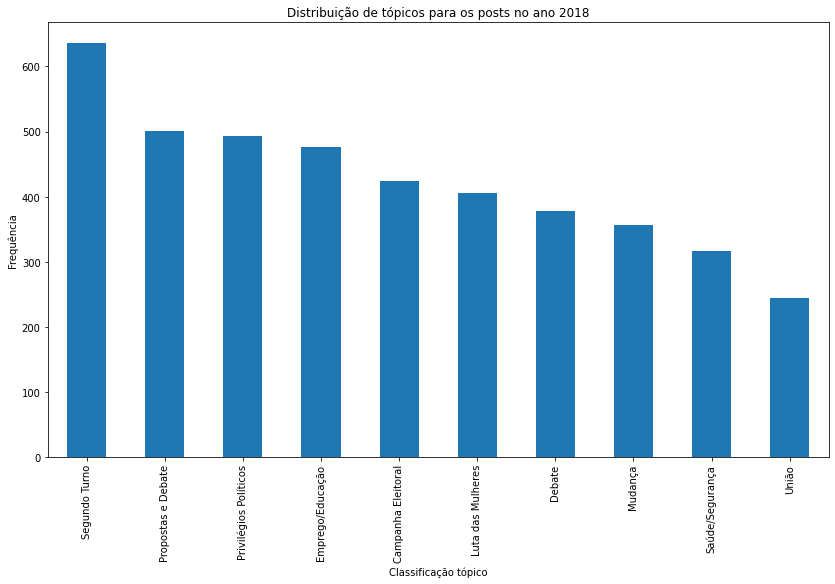

In [80]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018)
#===========================================================================

ax = category_count_2018.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos para os posts no ano 2018")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")

In [81]:
#===========================================================================
# ordenando df_election por reacoes angry
#===========================================================================

df_election_sorted_by_angry = df_election.sort_values('reactions_angry', ascending=False) # ordenando o df por angry

In [83]:
#===========================================================================
# contando as categorias de tópicos apenas para as 30 postagens com +
# reações angry durante as eleições de 2018
#===========================================================================

category_count_2018_sorted_by_angry = df_election_sorted_by_angry.head(30)['topic_classification'].value_counts()
print(category_count_2018_sorted_by_angry)

Campanha Eleitoral       5
Privilégios Políticos    5
Segundo Turno            4
União                    3
Saúde/Segurança          3
Emprego/Educação         3
Propostas e Debate       3
Luta das Mulheres        2
Debate                   2
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

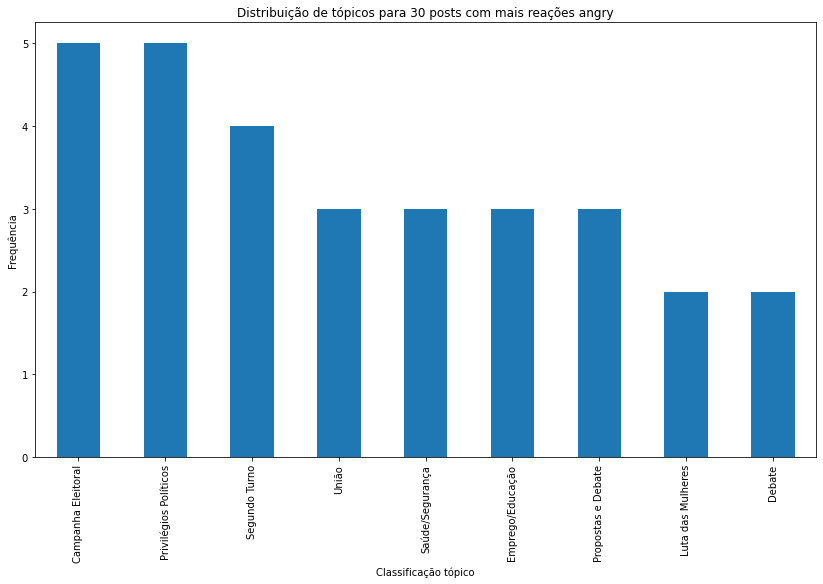

In [84]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018 para os posts com mais reações angry - 30)
#===========================================================================

ax = category_count_2018_sorted_by_angry.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos para 30 posts com mais reações angry")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")

In [85]:
#===========================================================================
# Iterando sobre o df para visualizar as menssagens e seus topicos inferidos
#===========================================================================

for index,row in df_election_sorted_by_angry.iterrows():
   print(row['m_m_p_replaced_to_empty'],':::',row['topic_classification'],'\n\n')

ameaca vai ser transmitida midia so responder defenderei familia propriedade entao tentarao imputar novamente maior vilao universo palavra picou prostituta pt querer ofender prostitutas ::: Campanha Eleitoral 


assista tire conclusoes ::: Luta das Mulheres 


  ameaca justica povo brasileiro fingimento apreco democracia nao dura abrem boca gostaria opiniao tribunais deste pais vamos viver nesse mundo faz contas criado alguns ::: Privilégios Políticos 


aovivo resposta   sobre suposta invasao casa ataques mtst ::: União 


lula gleisi hoffmann exministro defesa celso amorim cenas deploraveis turma ainda quer governar brasil vez ::: Emprego/Educação 


pagina plano governo pt reduzir massa carceraria brasil atraves liberacao presidiarios ::: Emprego/Educação 


professor doutrinador humilha aluno simpatico   agradeco possa enviar nome escola municipio via escola partido ::: Campanha Eleitoral 


lamento ministro stf desrespeite liberdade expressao abuse cargo ameacar critica ocupam car

coletiva representante lula   maceio governador renan filho senador renan calheiros lulae pelobrasil ::: Segundo Turno 


cafecom  vivo fatos semana escola partido lei contra movimentos sociais fim ministerio trabalho ::: Privilégios Políticos 


brasil nao precisa nesse momento dificil candidatos estimulem odio separacao sociedade nao bom pais ::: Privilégios Políticos 


diante eleicoes dificeis ultimos tempos comecar guerra informacoes falsas internet unir maior numero possivel pessoas batalharmos juntos dia apos dia convite simples direto feito vice ana amelia lemos faca parte time comece hoje mudanca pais tanto precisa salve whatsapp agenda celular mande mensagem nome cidade cadastrese tambem equipega   ::: Propostas e Debate 


  espirito reconciliacao uniao nacional   unica possibilidade unir brasil entrevista giannetti andre lara resende valor economico ::: Luta das Mulheres 


vamos juntos todos brasil campanha todos querem mudar pais melhor hino nacional fala patria mae genti

cantor leonardo goncalves vota   presidente vote via cristao voto   ::: Propostas e Debate 


ontem av paulista sao paulo ruas democraticas pais bonito ver ambiente liberdade expressao gente todos lugares faixas sociais vote ::: Saúde/Segurança 


entrevista lamentei pedi eleitores nao pratiquem violencia jornais publicaram apenas fala isolada manipular opiniao publica esqueceram levou facada motivacoes politicas desinformacao servico ::: Luta das Mulheres 


mediocridade folha sp brasil futuro link youtube ::: Luta das Mulheres 


formatura sargentos policia militar estado sao paulo ::: Saúde/Segurança 


umas reportagens ridiculas conhecimento apoio espontaneo povo simplesmente algo fantastico ja midia ::: Debate 


sobre voto util nesta reta final vote representa derrotar atraso vote   votenoqueacredita   psol ::: Luta das Mulheres 


lado partido deixou brasil maior recessao historia outro candidato ha anos congresso nenhum trabalho relevante velho velho escolha novo vote medo vote

conhece   apoia   cientista antonio nobre ha anos apontando caminhos possiveis restaurar proteger floresta amazonica ::: Privilégios Políticos 


anunciamos nesta semana nomes equipe responsavel area educacao plano governo melhorar educacao prioridade passo fundamental brasil cresca oportunidades maior renda brasileiros ana maria diniz fundadoras movimento todos educacao presidente conselho instituto peninsula mantem instituto singularidades focado formacao professores maria helena guimaraes castro secretariaexecutiva ministerio educacao presidente inep secretaria educacao estado sao paulo alem lider falconi educacao wilson risolia chefiou pasta educacao estado rio janeiro periodo estado saiu posicao ideb indice desenvolvimento educacao basica sao profissionais formacao rica diversificada larga experiencia competencia comprovada ::: Emprego/Educação 


pt psdb pmdb dem precisam quatro anos sabaticos reler programas sao partidos deram contribuicoes perderam apego poder ::: Campanha Elei

obrigado joinville abraco santa catarina ::: Debate 


mae nao condena pm morte filho simplesmente assista ::: Luta das Mulheres 


entrevista roda viva   reforcou garra disposicao unir pessoas afinal mudar brasil melhor precisamos uniao acoes conjuntas trabalhando modo firme toma la ca estabelecendo aliancas mostrem organizacao governabilidade equipe diversificada preparada fazer gente avancar acompanhe   debatendo temas geracao emprego renda prioridades educacao melhoria sistema publico saude combate crime organizado alguns melhores momentos participacao rodaviva equipepsdb  natv ::: Emprego/Educação 


campinassp destino mg ::: Segundo Turno 


  vivo matar jovens nao compromisso vida chegou chegou ajude levar mensagem brasileiros compartilhe agora ::: União 


faz parte carater essencia   respeito apoio luta mulheres igualdade pensando nisso voce consegue imaginar pode acontecer pais presidente acha normal mulher ser inferiorizada compartilhe redes sociais grupos whatsapp dia outub

domingo abril maratona rio obrigado rio janeiro participantes todo brasil ::: Debate 


campanha   chega caruaru pe ::: Campanha Eleitoral 


obrigado molecada abraco voces pais kkkkkk fiquem deus ::: Debate 


conheca sobre vida   acesse futuromelhoragora ::: Luta das Mulheres 


nao perca sono pensando futuro pais assista entrevista   hoje jornal globo logo apos the voice brasil equipega   jornaldaglobo ::: Luta das Mulheres 


entrevista radio bandeirantes falei sobre serie medidas precisam ser feitas brasil recuperarmos economia melhorarmos vida pessoas preparadoparaobrasil ::: Privilégios Políticos 


  ::: Segundo Turno 


amanha debate globo nao perca vamos defender projeto vote ::: Campanha Eleitoral 


  rui costa direto bahia povo brasileiro hoje dia pedir voto pro   ::: Debate 


educacao inclusiva bilingue surdos vote  ::: Campanha Eleitoral 


praca bandeiracampina grandepb obrigado nordeste ::: Debate 


florianopolis obrigatorio comer ostra delicia    presidente anaameli

entregamos ontem fase obras hospital regional osasco referencia neurologia neurocirurgia traumatologia regiao metropolitana sao paulo fizemos investimento r milhoes ampliacao aumento numero leitos compra novos equipamentos saude prioridade preparadoparaobrasil ::: Saúde/Segurança 


honra voltar unimes santos faculdade onde professor anos atras hoje ocasiao especial ministrei aula magna cursos area saude ainda participei inauguracao biblioteca   jose rodrigues   homenagem saudoso pai ::: Emprego/Educação 


ultimos anos vivemos grave crise provocada governos experiencia responsabilidade duas caracteristicas essenciais comandar pais tamanho brasil preparadoparaobrasil ::: Emprego/Educação 


surpresa bacana cruz altario grande sul obrigado consideracao ::: Debate 


candidato preparado enfrentar equipepsdb preparadoparaobrasil ::: Emprego/Educação 


comecamos hoje programa volta aulas grande esforco estado sao paulo realizar manutencao mil escolas rede paulista sao reparos obras preven

aqui muro vergonha minutos jerusalem passagem trabalhadores palestinos ponto controle revista exercito israelense muro segrega territorios palestinos viola resolucoes onu direito internacional palestinalivre ::: Debate 


inauguramos penitenciaria feminina guariba parte grande investimento sistema penitenciario sao paulo ter bons presidios essencial seguranca publica trabalho melhorando indicadores violencia estado ::: Saúde/Segurança 


hoje vamos protestar ruas brasil contra todas formas autoritarismo tentam calar voz todas formas corrupcao enfraquecem democracia ::: Mudança 


falar facil quero ver ja fez voce viaja pais certamente ja passou estradas federais pessimas condicoes nao podemos aceitar ter estrada boa assim todo mundo pode viajar seguranca produtos sao transportados rapidez investimento rodovias ajuda preservar vidas estimula desenvolvimento gera empregos sera   experiencia nesse assunto confira equipega ::: Emprego/Educação 


passar pente fino despesas publicas bilhao 

  manuela davila rui costa jaques wagner   jequie bahia ::: Segundo Turno 


hoje assinamos coligacao cidada rede sustentabilidade movimento agora candidaturas independentes sao fundamentais quebrar monopolio partidos renovacao politica tarefa urgente precisa acontecer agora ::: Privilégios Políticos 


inauguracao comite fatima bezerra lula mossoro rio grande norte mostraolulaglobo ::: Debate 


agora hora virada mobilizacao continua neste fim semana caminhadas planfletagens adesivacos bandeiracos muitos eventos levar   ana amelia segundo turno vamos tomar ruas fazer maior festa todo brasil participe leve amigos familiares vamos todos juntos confira programacao completa informacoes contato      equipega ::: Segundo Turno 


mortalidade infantil brasil bernardo p kuster ::: Mudança 


bom dia todos caminho baixada santista dia encontro movimentos sociais entrevistas imprensa vamoscom  psol ::: Mudança 


chega dessa divisao acabando pais obrigado apoio vamos mudar brasil beijo querido 

aovivo entrevista globo news ::: União 


aovivo brasil debate promovido associacao comercial rio janeiro ::: Debate 


semana participei sabatina tv brasil apresentei varias propostas falei seguranca publica educacao saude politicas lgbt reforma tributaria assista agora  esonia ::: Luta das Mulheres 


politica social inovadora totalmente voltada precisa conheca principais propostas   vote  presidente equipega anaameliavice ::: Propostas e Debate 


  aovivo trabalhadoras sindicalistas curitiba pr ::: União 


aovivo lado mulheres lutando contra retrocesso elenao ::: União 


mude foto perfil tema   bitly  ::: Segundo Turno 


otima noticia ano queda numero acidentes durante carnaval relacao ano passado vamos seguir trabalhando empenho diminuir numeros obras melhorar estradas fiscalizacao campanhas conscientizacao brasil perde muitas vidas acidentes mudar preparadoparaobrasil ::: Mudança 


politicos novo recusam receber penduricalhos salarios vereadores eleitos partido ja economizara

entregamos ontem mil moradias cidades pindamonhangaba cruzeiro aproxima marca mil casas entregues desde trabalho importantissimo nao apenas familias ganham lar tambem empregos gerados obras investimento traz retorno todo mundo preparadoparaobrasil ::: Emprego/Educação 


chegada juazeiro nortece    presidente ::: Propostas e Debate 


muitas mulheres estarao gente amanha caminhada paz ibirapuera h venha branco traga rosa vamos unir mudar brasil    presidente ::: Propostas e Debate 


ja quatro capitais norte agora   chega macapa lado candidato governador waldez goes   agradece empolgacao populacao macapaense vibra junto    presidente ::: Campanha Eleitoral 


dar moradia digna precisa prioridades governo desde mil unidades sao quase mil familias sairam aluguel conquistaram sonho casa propriaa politica bem feita muda vida pessoas preparadoparaobrasil ::: Emprego/Educação 


rio branco   ::: Debate 


nao ficar feliz recepcao dessa emociono cada chegada nova cidade sendo recebido tanto c


ja conferiu agenda   dessa semana fique olho redes acompanhar perto precandidato novo brasil voce tambem pode saber ::: Propostas e Debate 


acabei assinar decreto fundo especial bombeiros proposta vai trazer investimentos corporacao compras equipamentos ultima geracao ainda ambulancias servir resgates qualidade atendimento populacao ::: Saúde/Segurança 


transformar brasil possivel sim   conta participacao jovens pra veja encontro jovens diferentes partidos organizacoes sociedade civil nesta semana equipepsdb  pelobrasil ::: Emprego/Educação 


assista entrevista dei tve bahia jornalista bob fernandes aovivo ::: Luta das Mulheres 


  recebido nucleo bandeirante df muita festa multidao quer mudanca acompanhou cirao durante percurso lado candidato reeleicao governo distrito federal rodrigo rollemberg  presidente   fotos leo canabarro ::: Saúde/Segurança 


vo mae sao tudo bom diade  ::: Saúde/Segurança 


evento oficial confirme presenca compareca locais oficiais todaquartae marque 

aovivo bate papo vereador recife candidato deputado federal ivan moraes sobre propostas brasil ::: Campanha Eleitoral 


hora agora bora pra arrancada vamos juntos levar   ana amelia segundo turno vamos mostrar unidos forca levar mensagem mudanca todos sotaques culturas etnias ideais confira programacao completa      equipega ::: Segundo Turno 


hoje adesivaco todo brasil vamos colocar   ana amelia segundo turno confira imagem horario endereco participe veja cidades participantes aqui      equipega ::: Segundo Turno 


poupatempo completou anos entregues novas unidades so lugar cidadao recebe tipos atendimento grande sucesso estado sao paulo util todos cantos pais preparadoparaobrasil ::: Emprego/Educação 


bahia tambem gente renovacao obrigado todos forca vamos mostrar poder onda laranja urnas mudar brasil ::: Mudança 


andre motorista aplicativo tambem gente novo brasil vote medo vote vote   ::: Campanha Eleitoral 


canta males espanta caminho debate band  naband ::: Debate 


as

chegou hora tratar seguranca seriedade precisa hora eleger presidente compromisso real combater violencia construir novo brasil dia outubro vote medo vote vote   ::: Propostas e Debate 


pessoal forca onda laranja chegamos milhao assinaturas participacao debates mesma forca vamos eleger representantes vao mudar sistema faz tudo impedir renovacao politica vote medo vote vote   ::: Campanha Eleitoral 


existe pais mundo condicoes aliar necessidades povo preservacao meio ambiente pais brasil ::: Emprego/Educação 


nesses anos promulgacao constituicao avancamos areas estrategicas sociedade implementacao sistema unico saude direito crianca adolescente tutela meio ambiente agora compromisso resguardala possamos continuar exercendo plena cidadania promovendo cada vez justica paz social ::: Emprego/Educação 


  ::: Segundo Turno 


nao existe salvador patria existem sao principios valores essenciais fazer mudanca pais precisa caminho novo brasil ::: Emprego/Educação 


exemplo ceara mostra

hoje dia debate tv aparecida h acompanhem   ::: Debate 


aovivo entrevista radio cbn campinas ::: União 


biblioteca sao paulo bsp finalista the london book fair international excellence awards categoria melhor biblioteca ano representante paulista concorre lado bibliotecas oslo noruega aarhus dinamarca riga letonia premio reconhecimento boas praticas biblioteca orgulho sao paulo ::: Saúde/Segurança 


homenagem diadaarvore amanha vamos realizar atividades mobilizacao todo brasil confira programacao vote  ::: Segundo Turno 


escola profissionalizante tempo integral ensino medio vai tratar jovem respeito merece ainda preparalo profissao conheca proposta completa www  combrpropostasescolaprofissionalizantedetempointegral    presidente pergunteao  ::: Propostas e Debate 


patricia mae jovem negra teto conheca historia mulher oportunidade revolucionar vida partir luta mtst movimento trabalhadores semteto equipe vamossemmedo  esonia psol nova politica faz novo jeito financie ideia vamos